# Image Processing

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image
import xgboost
import warnings
warnings.filterwarnings('ignore')
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Importing and Extracting zipfile

In [99]:
import zipfile 
with zipfile.ZipFile(r"C:\Users\bbhav\Downloads\mnist.zip") as zip_ref:
    zip_ref.extractall('C:/Users/bbhav/Downloads/')

import os
file_name= os.listdir('C:/Users/bbhav/Downloads/New folder')
print('Total number of files in the dataset:',len(file_name))

Total number of files in the dataset: 26


In [100]:
dir = 'C:/Users/bbhav/Downloads/New folder'
image = []
label = []

for roots,dirs, files in os.walk(dir):
    for file in files:
        if file.endswith('.png'):
            a=os.path.join(roots,file)
            with Image.open(a) as img:
                image.append(img.copy())
                label.append(file[0])

In [108]:
png=pd.DataFrame({"images":image,"Label":label})
png.to_csv("images.csv")

In [102]:
print(len(png["Label"]))
print(len(png["images"]))

372451
372451


In [103]:
png.images[5]

In [104]:
png.images[5].size

(28, 28)

### thumbnail()

In [106]:
for i in png.images:
    i.thumbnail((15,15))    

### Resize

In [107]:
png.images[5].size

(15, 15)

### flatten()

In [110]:
p=[]
for i in png['images']:
    p.append(np.array(i).flatten())

In [116]:
p

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 189,
         58,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        130, 255,  99,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  66, 242, 251, 131,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   8, 196, 188, 193, 131,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  81, 247,  78, 174, 104,  11,   2,   0,   0,
          0,   0,   0,   0,   0,  16, 201, 255, 235, 242, 227, 201,  45,
          0,   0,   0,   0,   0,   0,   0,  73, 255, 164,  96, 190, 200,
         82,  12,   0,   0,   0,   0,   0,   0,   6, 182, 219,   5,   0,
        139, 147,   0,   0,   0,   0,   0,   0,   0,   0,  44, 242, 113,
          0,   0, 106, 184,   2,   0,   0,   0,   0,   0,   0,   0,   9,
         47,   7,   0,   0,  58, 229,  37,   0,   0

### Creating DataFrame

In [121]:
Data_Frame = pd.DataFrame(p)

In [122]:
Data_Frame['Labels'] = label
Data_Frame

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z


### Converting Dataframe to CSV file

In [123]:
Data_Frame.to_csv("df.csv")

In [124]:
df=pd.read_csv(r"C:\Users\bbhav\Downloads\df.csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


### Data Cleaning

In [125]:
df.drop('Unnamed: 0',axis=1, inplace= True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [128]:
new_columns = ['pixel_' + str(i) for i in range(len(df.columns))]
df = df.rename(columns=dict(zip(df.columns[:226], new_columns)))
df = df.rename(columns={'pixel_225' : 'Labels'})

df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_216,pixel_217,pixel_218,pixel_219,pixel_220,pixel_221,pixel_222,pixel_223,pixel_224,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [129]:
df.shape

(372451, 226)

In [130]:
df.isna().sum()

pixel_0      0
pixel_1      0
pixel_2      0
pixel_3      0
pixel_4      0
            ..
pixel_221    0
pixel_222    0
pixel_223    0
pixel_224    0
Labels       0
Length: 226, dtype: int64

### Plots on Labels

<AxesSubplot:xlabel='Labels', ylabel='count'>

Text(0.5, 1.0, 'Count of Labels')

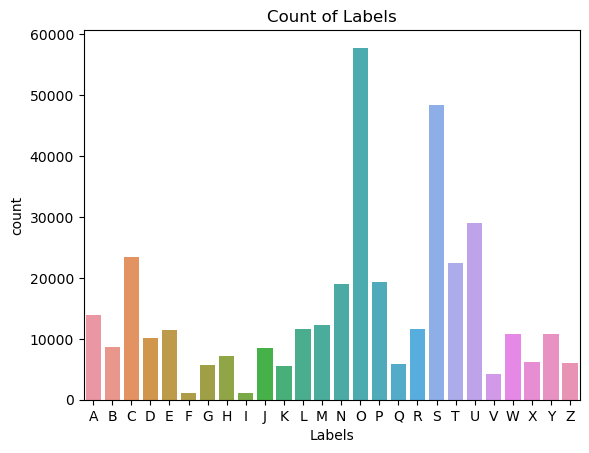

In [131]:
sns.countplot(data=df, x=df.Labels.sort_values())
plt.title('Count of Labels')
plt.show()

>### Observation:
From the above plot we can observe that the Labels are sorted in `alphabetical order`. The given dataset is `imbalanced`.

In [132]:
df1=df['Labels'].value_counts()

<AxesSubplot:>

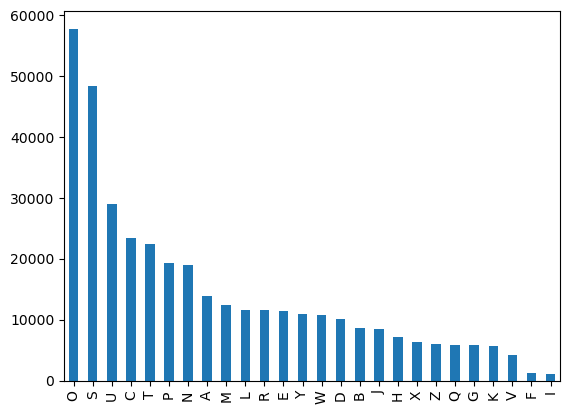

In [133]:
df1.plot(kind='bar')

>### Observation:
From the above bar plot we observed that `O` Folder has highest number of Images which is more than `50000` and `I` Folder has less Images which is less than `10000`.

### Dropping Labels Column

In [18]:
X = df.drop('Labels', axis=1)

Y = df['Labels']

In [19]:
idx = np.random.randint(0, 372451, 9)

print(idx)

[322433  24119  26795 118816 117449 263003 207135  53764 102791]


### reshape()

L
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   8 170 188  53   0   0   0   0   0   0]
 [  0   0   0   0   0  89 255 255  97   0   0   0   0   0   0]
 [  0   0   0   0   0  16 213 245  25   0   0   0   0   0   0]
 [  0   0   0   0   2 141 248 127   1   0   0   0   0   0   0]
 [  0   0   0   0 111 255 251  65   0   0   0   0   0   0   0]
 [  0   0   0  18 225 255 130   2   0   0   0   0   0   0   0]
 [  0   0   0 109 254 247  53   0   0   0   0   0   0   0   0]
 [  0   0  26 227 255 227  34  26  27  17  21 144  40   0   0]
 [  0   0  43 240 255 251 226 227 227 209 200 255  80   0   0]
 [  0   0  35 236 255 255 255 255 255 255 255 219  26   0   0]
 [  0   0   3  89 124 137 213 214 162 199 214  95   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


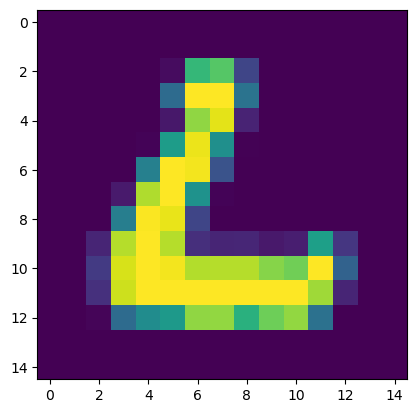

In [20]:
print(Y[idx[4]])

print(np.reshape(X.values[idx[4]], (15,15)))

img = np.reshape(X.values[idx[4]], (15,15))

plt.imshow(img)

### Image_grid

<Figure size 1200x1200 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'S')

<AxesSubplot:>

Text(0.5, 1.0, 'S')

<AxesSubplot:>

Text(0.5, 1.0, 'M')

<AxesSubplot:>

Text(0.5, 1.0, 'J')

<AxesSubplot:>

Text(0.5, 1.0, 'S')

<AxesSubplot:>

Text(0.5, 1.0, 'U')

<AxesSubplot:>

Text(0.5, 1.0, 'S')

<AxesSubplot:>

Text(0.5, 1.0, 'H')

<AxesSubplot:>

Text(0.5, 1.0, 'U')

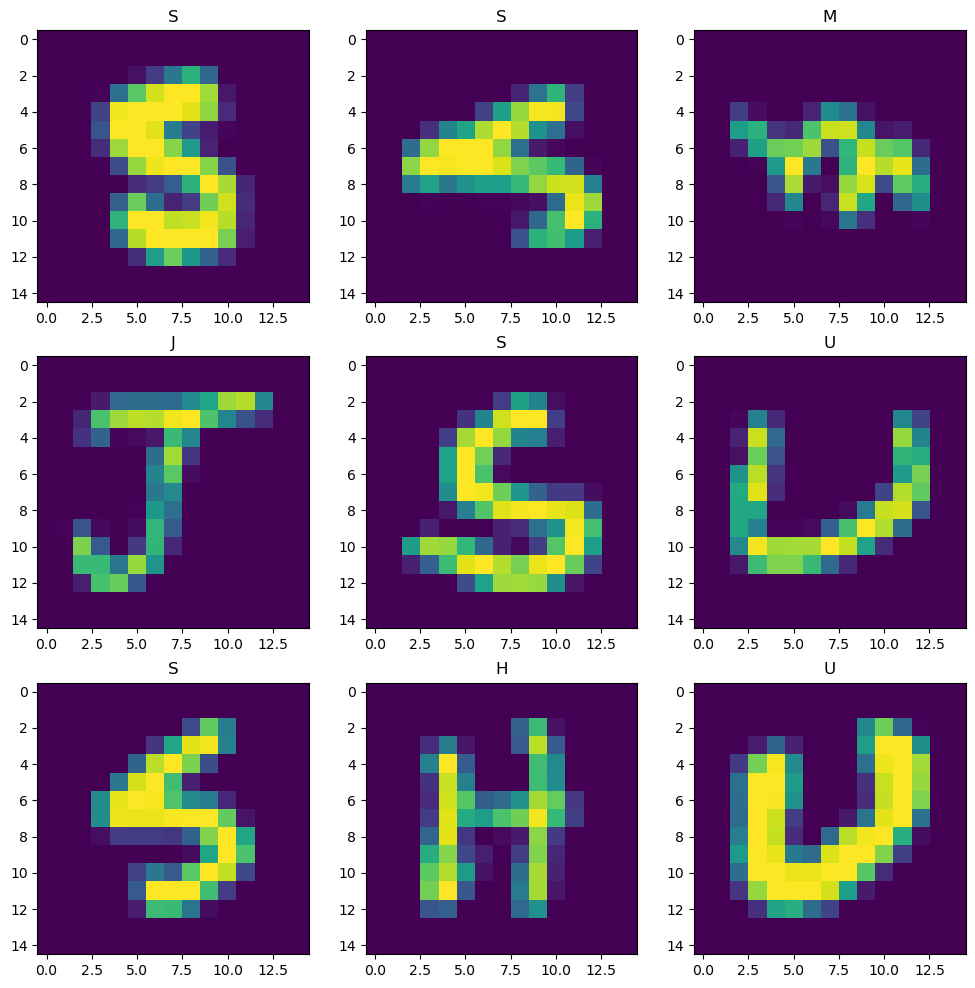

In [21]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, 372451, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(Y[idx[i]])
    img_grid = np.reshape(X.values[idx[i]], (15,15))
    plt.imshow(img_grid)


# Model Building

### Train_Test_Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=69)

In [23]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)                #Checking shapes of my splitted Data Frame 

(279338, 225) (93113, 225) (279338,) (93113,)


### Trained_Numerical_ Data

In [24]:
X_train.head()                                                                  #Checking my X_train DF

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_215,pixel_216,pixel_217,pixel_218,pixel_219,pixel_220,pixel_221,pixel_222,pixel_223,pixel_224
335439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Tested_Numerical_ Data

In [25]:
X_test.head()                                                                   #Checking my X_test DF

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_215,pixel_216,pixel_217,pixel_218,pixel_219,pixel_220,pixel_221,pixel_222,pixel_223,pixel_224
34036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
361771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Trained_Categorical_Data

In [26]:
Y_train.head()                                                                 #Checking my Y_train DF

335439    H
27925     A
324567    S
66014     T
236269    N
Name: Labels, dtype: object

### Tested_Categorical_Data

In [27]:
Y_test.head()                                                                   #Checking my Y_test DF

34036     A
304174    S
197460    R
361771    U
92684     P
Name: Labels, dtype: object

### Importing all our required Algorithms.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
from xgboost import XGBClassifier

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
X=df['Labels']
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(X)        
df['Labels'] = encoded_labels

### Converting Labels to Numerical
Y_train_encoded = encoder.fit_transform(Y_train)


xgb = XGBClassifier()
xgb.fit(X_train,Y_train_encoded)

y_pred_encoded = xgb.predict(X_test)

### Transforming Numerical to original values
y_pred=encoder.inverse_transform(y_pred_encoded)

### Calculating metrics values 
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred, average = 'weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1score = f1_score(Y_test, y_pred, average='weighted')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [33]:
 acc, precision, recall, f1score  

(0.9889489115375941,
 0.9889474367154193,
 0.9889489115375941,
 0.9889301877951252)

### Assigning variables to our methods

In [34]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
ab = AdaBoostClassifier()
svc = SVC()
xgb = XGBClassifier()

### Fit or Training or model using different Algorithm methods

In [35]:
lr.fit(X_train, Y_train)
dt.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
knn.fit(X_train, Y_train)
gnb.fit(X_train, Y_train)
svc.fit(X_train, Y_train)  
ab.fit(X_train, Y_train)

LogisticRegression()

DecisionTreeClassifier()

RandomForestClassifier()

KNeighborsClassifier()

GaussianNB()

SVC()

AdaBoostClassifier()

### Predicting the Data

In [39]:
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_ab = ab.predict(X_test)

### Predicted values

In [40]:
y_pred_lr
y_pred_dt
y_pred_rf
y_pred_knn
y_pred_gnb
y_pred_svc
y_pred_ab
y_pred

array(['A', 'S', 'R', ..., 'D', 'S', 'A'], dtype=object)

array(['A', 'S', 'R', ..., 'D', 'S', 'A'], dtype=object)

array(['A', 'S', 'R', ..., 'D', 'G', 'M'], dtype=object)

array(['A', 'S', 'R', ..., 'D', 'G', 'M'], dtype=object)

array(['N', 'S', 'H', ..., 'O', 'G', 'H'], dtype='<U1')

array(['A', 'S', 'R', ..., 'D', 'G', 'M'], dtype=object)

array(['N', 'S', 'E', ..., 'S', 'S', 'M'], dtype=object)

array(['A', 'S', 'R', ..., 'D', 'G', 'M'], dtype=object)

### Metric Function 

In [42]:
def metric_cal(real_test, pred_test):
    acc = accuracy_score(real_test, pred_test)
    precision = precision_score(real_test, pred_test, average='weighted')
    recall = recall_score(real_test, pred_test, average='weighted')
    cm = pd.crosstab(real_test, pred_test, rownames=['Real'], colnames=['Predicted'])
    f1score = f1_score(real_test, pred_test, average='weighted')
    return{'Accuracy':acc,
            'Precision':precision,
            'Recall':recall,
            'f1score':f1score,
            'Confusion Matrix':cm}
    

In [43]:
acc_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['Accuracy'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['Accuracy'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['Accuracy'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['Accuracy'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['Accuracy'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['Accuracy'],
            'AdaBoost': metric_cal(y_pred_ab, Y_test.values.flatten())['Accuracy'],
            'XGBoost': metric_cal(y_pred, Y_test.values.flatten())['Accuracy']
           }

pre_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['Precision'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['Precision'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['Precision'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['Precision'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['Precision'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['Precision'],
            'AdaBoost': metric_cal(y_pred_ab, Y_test.values.flatten())['Precision'],
            'XGBoost': metric_cal(y_pred, Y_test.values.flatten())['Precision']
           }

recal_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['Recall'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['Recall'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['Recall'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['Recall'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['Recall'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['Recall'],
            'AdaBoost': metric_cal(y_pred_ab, Y_test.values.flatten())['Recall'],
            'XGBoost': metric_cal(y_pred, Y_test.values.flatten())['Recall']
           }

f1_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['f1score'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['f1score'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['f1score'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['f1score'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['f1score'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['f1score'],
            'AdaBoost': metric_cal(y_pred_ab, Y_test.values.flatten())['f1score'],
            'XGBoost': metric_cal(y_pred, Y_test.values.flatten())['f1score']

           }

In [44]:
acc_dict,pre_dict,recal_dict,f1_dict

({'Logistic Regresion': 0.8734333551705992,
  'Decision Tree': 0.9566977758207769,
  'Random Forest': 0.9855014874399922,
  'KNN Algorith': 0.9666104625562488,
  'Gaussian NB': 0.5411167076562886,
  'SVM': 0.9782200122431883,
  'AdaBoost': 0.5916467088376489,
  'XGBoost': 0.9889489115375941},
 {'Logistic Regresion': 0.8756766428595071,
  'Decision Tree': 0.9571211494633978,
  'Random Forest': 0.9857130562765953,
  'KNN Algorith': 0.9678165445072182,
  'Gaussian NB': 0.7392585214948915,
  'SVM': 0.9784192433006702,
  'AdaBoost': 0.6227805900782786,
  'XGBoost': 0.9890212279056453},
 {'Logistic Regresion': 0.8734333551705992,
  'Decision Tree': 0.9566977758207769,
  'Random Forest': 0.9855014874399922,
  'KNN Algorith': 0.9666104625562488,
  'Gaussian NB': 0.5411167076562886,
  'SVM': 0.9782200122431883,
  'AdaBoost': 0.5916467088376489,
  'XGBoost': 0.9889489115375941},
 {'Logistic Regresion': 0.8742790470751826,
  'Decision Tree': 0.9568438657660916,
  'Random Forest': 0.98554997303203

### DataFrame of Metrics

In [45]:
op_df =pd.DataFrame.from_dict([acc_dict,pre_dict,recal_dict,f1_dict])
op_df=op_df.rename(index={0:'Accuracy',1:'Precision',2:'Recall',3:'F1-Score'})
op_df = pd.DataFrame.transpose(op_df)
op_df

,Accuracy,Precision,Recall,F1-Score
Logistic Regresion,0.873433,0.875677,0.873433,0.874279
Decision Tree,0.956698,0.957121,0.956698,0.956844
Random Forest,0.985501,0.985713,0.985501,0.985550
KNN Algorith,0.966610,0.967817,0.966610,0.966877
Gaussian NB,0.541117,0.739259,0.541117,0.589570
SVM,0.978220,0.978419,0.978220,0.978265
AdaBoost,0.591647,0.622781,0.591647,0.598801
XGBoost,0.988949,0.989021,0.988949,0.988968


### Barplots of Metrics

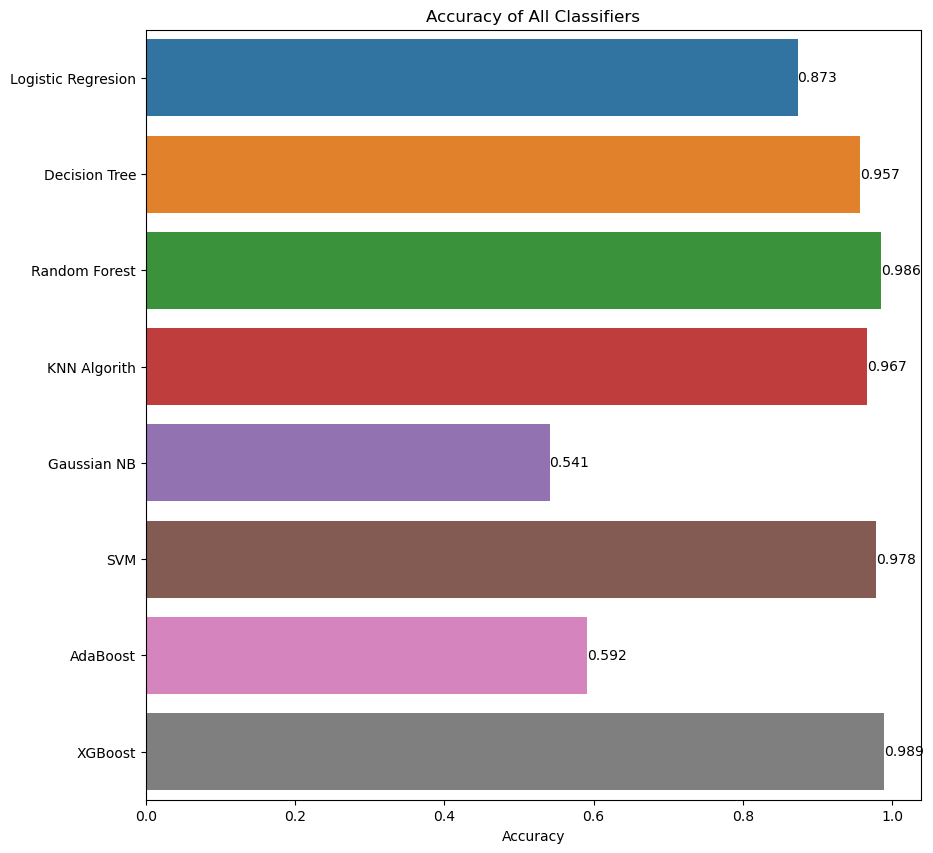

In [46]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=op_df['Accuracy'],y=op_df.index)
ax.bar_label(ax.containers[0],fmt='%.3f')
plt.title('Accuracy of All Classifiers')
plt.show();

>### Observation:
From the above barplot we observed that `Random Forest` has high Accuracy that is `0.985609` and the `Gaussian NB` algorithm has low accuracy that is `0.541117`. 

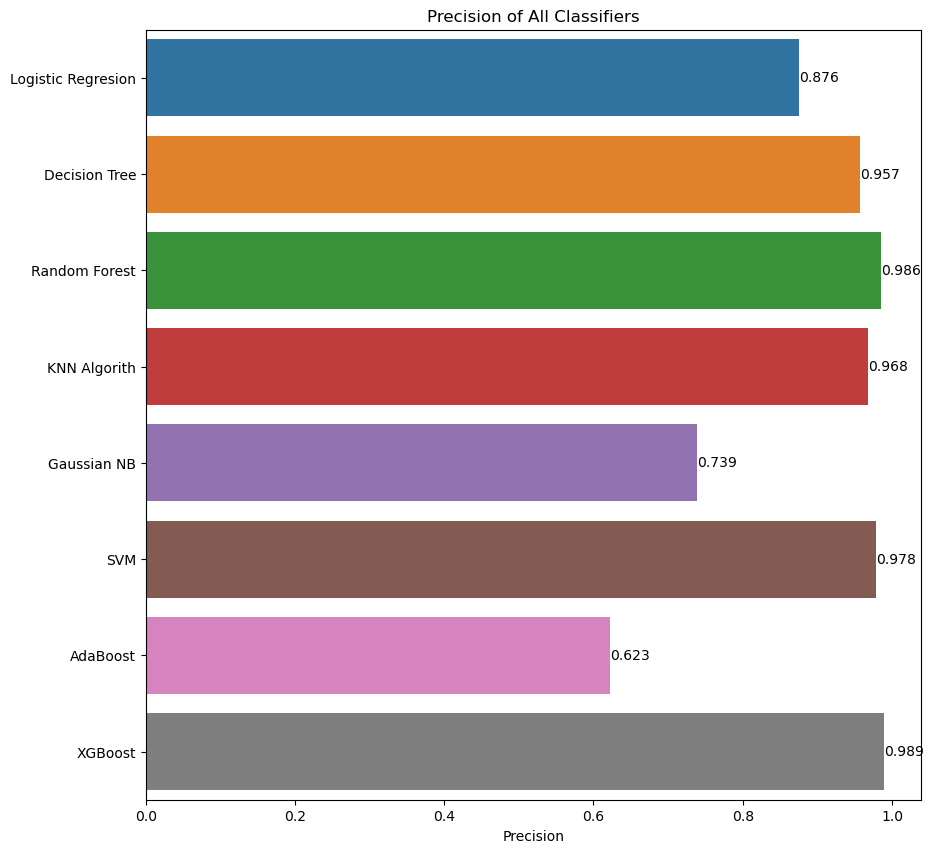

In [79]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=op_df['Precision'],y=op_df.index)
ax.bar_label(ax.containers[0],fmt='%.3f')
plt.title('Precision of All Classifiers')
plt.show();

>### Observation:
From the above barplot we observed that `Random Forest` has high Precision that is `0.985777` and the `Gaussian NB` algorithm has low Precision that is `0.739259`.

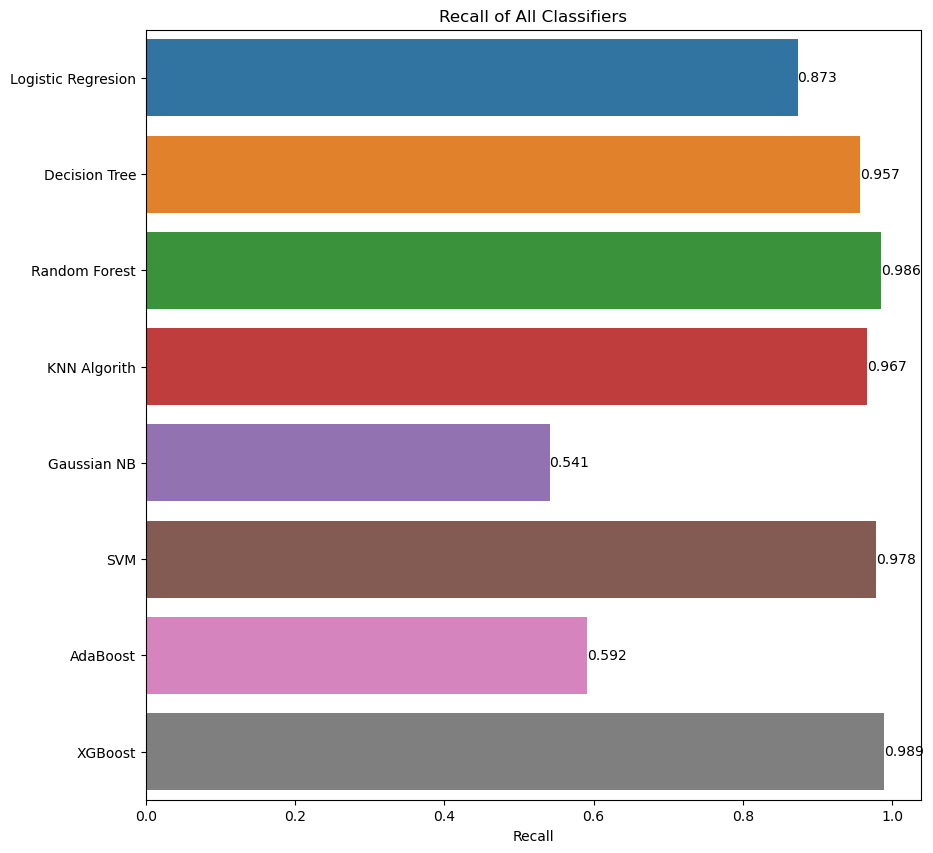

In [48]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=op_df['Recall'],y=op_df.index)
ax.bar_label(ax.containers[0],fmt='%.3f')
plt.title('Recall of All Classifiers')
plt.show();

>### Observation:
From the above barplot we observed that `Random Forest` has high Recall that is `0.985609` and the `Gaussian NB` algorithm has low Recall that is `0.541117`.

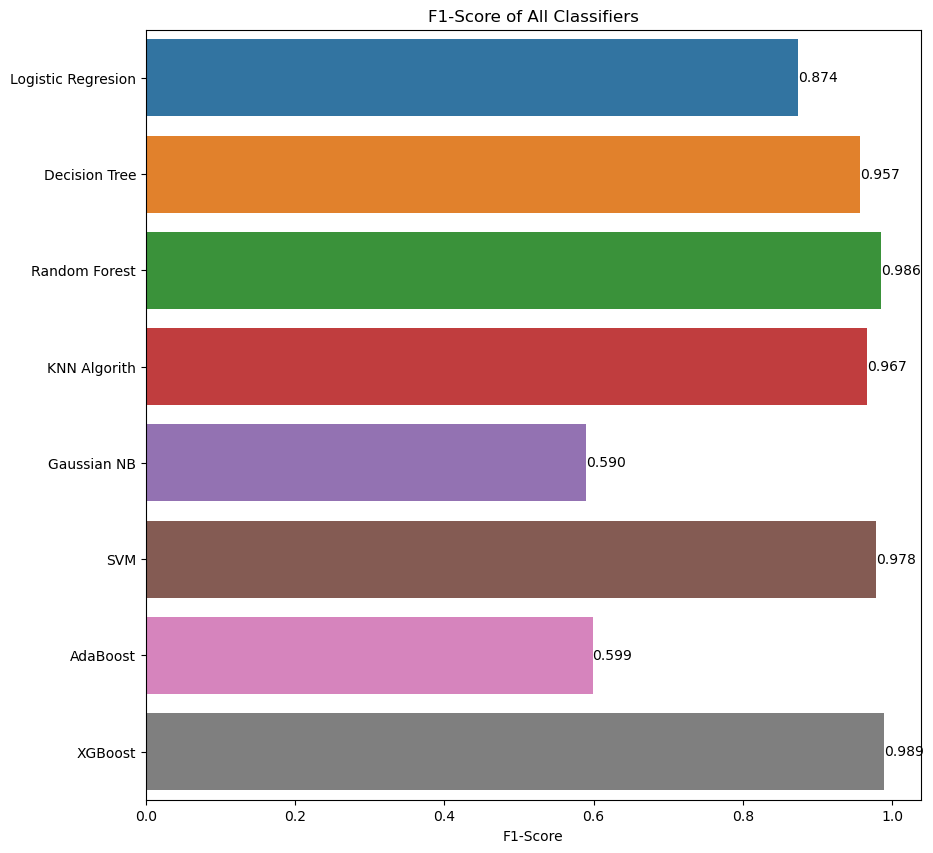

In [49]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=op_df['F1-Score'],y=op_df.index)
ax.bar_label(ax.containers[0],fmt='%.3f')
plt.title('F1-Score of All Classifiers')
plt.show();

>### Observation:
From the above barplot we observed that `Random Forest` has high F1-Score that is `0.98565` and the `Gaussian NB` algorithm has low F1-Score that is `0.58957`.

### DataFrame of Real and Predicted Values in RandomForest

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_grouped_bar_chart(df):
    # Calculate the count of predicted labels and true labels
    predicted_counts = df3["Predicted"].value_counts()
    true_counts = df3["Real"].value_counts()
    # Get the unique labels
    labels = df3["Predicted"].unique()
    labels.sort()  # Sort the labels in a consistent order
    
    # Set the width of each bar
    bar_width = 0.35
    
    # Set the positions of the bars on the x-axis
    x = np.arange(len(labels))
    
    # Set the figure size
    plt.figure(figsize=(10, 6))
    
    # Plot the predicted counts bar
    plt.bar(x - bar_width/2, predicted_counts.loc[labels], width=bar_width, color='blue', label='Predicted')
    
    # Plot the true counts bar
    plt.bar(x + bar_width/2, true_counts.loc[labels], width=bar_width, color='green', label='True')
    
    # Set the x-axis tick positions and labels
    plt.xticks(x, labels)
    
    # Set the axis labels and title
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Count of Predicted and True Labels')
    
    # Add legend
    plt.legend()
    
    # Show the chart
    plt.show()

## 1. RandomForest Classifier

>### Create a Data Frame with Real and Predicted


In [87]:
a=pd.crosstab(Y_test, y_pred_rf, rownames=['Real'], colnames=['Predicted'], margins=True)
a.style.background_gradient(cmap="tab20_r")

Predicted,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,All
Real,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,3370,0,0,3,0,0,0,0,0,0,5,0,4,0,3,0,0,6,1,0,1,0,0,0,0,1,3394
B,20,2071,0,19,6,0,1,0,0,0,1,0,2,1,17,3,0,4,14,0,0,0,0,0,0,4,2163
C,0,0,5797,0,2,0,0,0,0,0,4,8,0,2,11,2,0,0,0,2,8,0,0,0,2,0,5838
D,0,0,0,2459,0,0,0,0,0,4,0,0,1,0,93,6,0,0,4,0,1,0,0,0,0,0,2568
E,0,1,25,2,2763,0,5,2,0,0,2,6,0,0,4,6,0,6,9,0,0,0,4,0,1,0,2836
F,0,0,0,0,4,259,0,0,0,0,0,0,0,1,0,15,0,0,1,2,0,0,0,0,0,0,282
G,5,9,10,0,5,0,1306,0,0,0,0,1,1,0,2,0,11,0,22,0,1,0,0,0,0,0,1373
H,26,0,0,0,0,0,0,1713,0,0,1,0,19,34,0,4,0,3,2,0,14,0,4,0,12,0,1832
I,0,0,2,0,0,0,0,0,239,5,0,0,0,0,0,0,0,0,4,1,0,0,0,1,0,4,256


In [83]:
rf=pd.DataFrame({'Real':Y_test,'Predicted':y_pred_rf})

In [91]:
rf.value_counts()

Real  Predicted
O     O            14233
S     S            12036
U     U             7205
C     C             5797
T     T             5583
                   ...  
Q     S                1
P     Y                1
      Q                1
N     Y                1
Q     C                1
Length: 255, dtype: int64

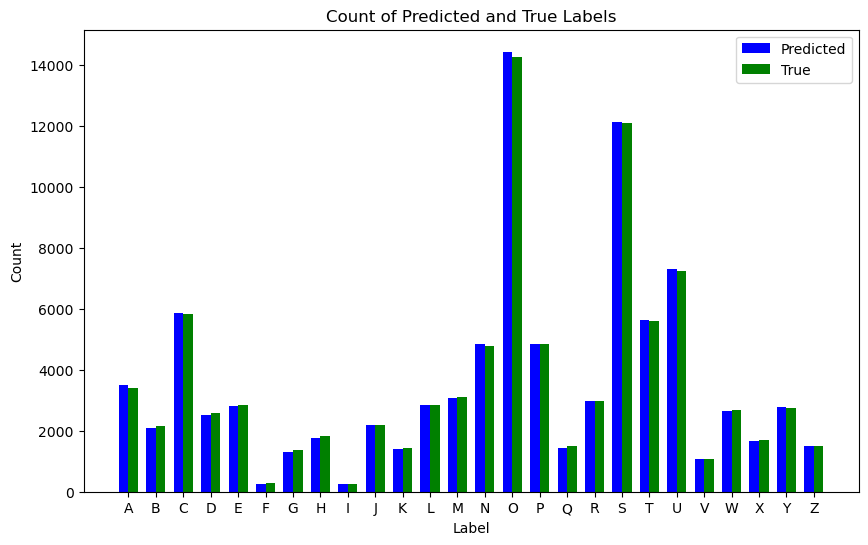

In [142]:
create_grouped_bar_chart(rf)

## 2. XGBoostClassifier

>### Create a Data Frame with Real and Predicted


In [92]:
a=pd.crosstab(Y_test, y_pred, rownames=['Real'], colnames=['Predicted'], margins=True)
a.style.background_gradient(cmap="tab20_r")

Predicted,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,All
Real,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,3369,1,0,3,0,0,0,3,0,0,5,2,4,1,0,0,1,4,1,0,0,0,0,0,0,0,3394
B,4,2108,0,7,5,0,0,0,0,0,2,0,3,0,13,1,2,6,10,0,0,0,0,0,0,2,2163
C,0,2,5796,0,2,0,0,0,0,1,4,12,0,0,7,4,2,0,2,0,6,0,0,0,0,0,5838
D,0,0,0,2500,0,0,0,1,0,0,0,2,0,2,56,4,0,0,2,0,0,0,0,0,0,1,2568
E,0,2,15,0,2789,0,2,2,0,0,2,6,0,0,4,0,0,2,7,0,0,0,2,0,3,0,2836
F,2,0,0,0,5,259,0,0,0,0,0,0,0,0,0,11,0,0,1,3,0,1,0,0,0,0,282
G,1,8,7,0,4,0,1326,0,0,0,0,1,1,0,9,0,9,0,5,0,0,0,2,0,0,0,1373
H,19,1,2,0,2,0,0,1757,0,0,4,0,9,18,0,0,0,0,0,0,9,0,1,0,10,0,1832
I,0,0,1,0,0,0,0,0,238,6,0,1,0,0,0,0,0,0,1,0,0,0,0,3,0,6,256


In [96]:
rf=pd.DataFrame({'Real':Y_test,'Predicted':y_pred_rf})

In [98]:
rf.value_counts()

Real  Predicted
O     O            14233
S     S            12036
U     U             7205
C     C             5797
T     T             5583
                   ...  
Q     S                1
P     Y                1
      Q                1
N     Y                1
Q     C                1
Length: 255, dtype: int64

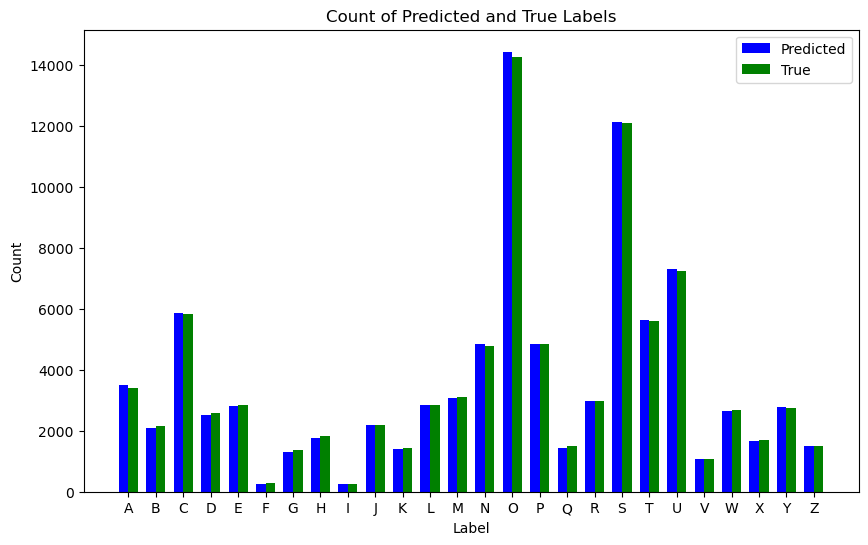

In [93]:
create_grouped_bar_chart(xgb)

In [143]:
a=pd.crosstab(Y_test, y_pred_gnb, rownames=['Real'], colnames=['Predicted'], margins=True)
a.style.background_gradient(cmap="tab20_r")

Predicted,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,All
Real,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,31,56,4,6,12,1,73,1439,0,3,0,7,401,315,274,10,34,38,324,54,6,123,9,164,7,3,3394
B,1,522,19,63,22,0,38,67,3,21,1,4,67,38,412,5,9,7,757,23,7,7,7,9,8,46,2163
C,1,40,2703,2,57,23,89,13,1,12,2,762,200,31,1514,18,94,3,71,80,1,7,75,0,36,3,5838
D,1,75,2,847,1,2,20,6,0,25,1,1,71,21,1163,14,12,3,196,7,18,1,47,0,4,30,2568
E,3,66,54,5,829,35,66,87,5,6,6,189,181,98,390,2,14,14,520,215,7,3,11,13,4,13,2836
F,0,0,0,0,4,249,2,5,0,0,1,0,0,0,1,2,0,2,0,12,2,0,1,1,0,0,282
G,2,22,31,1,8,2,720,10,0,11,0,10,31,19,217,0,49,4,198,11,5,1,16,2,3,0,1373
H,0,10,0,3,10,0,15,972,0,1,0,0,113,365,20,3,8,4,41,51,17,93,20,65,12,9,1832
I,0,1,0,1,1,1,0,0,144,1,1,12,0,0,0,0,1,0,35,34,0,0,0,6,2,16,256


In [134]:
import pickle

In [135]:
with open('model_rf', 'wb') as f:
    pickle.dump(rf, f)
    
with open('model_xgb', 'wb') as f:
    pickle.dump(svc, f)

In [136]:
with open('model_rf', 'rb') as files:
    mode = pickle.load(files)

In [137]:
with open('model_xgb', 'rb') as files:
    mode = pickle.load(files)

>### Conclusion:
From the above plots of all the metrics we observed that Random Forest and SVM Algorithms are best by its Accuracy rate.
Logistic Regression and AdaBoost Algorithms has almost equal Accuracy which is 0.873
K-Nearest Neighbous(KNN) Algorithm and Decision Tree are five Classifiers with Accuracy greater than 0.95.
Gaussian NB Algorithm has the lowest Accuracy, so it may not be suitable for Dataset.